# Social Media Analytics - Group Project 

###### Group 5: Salma BARKETALLAH, Ndjaidoukmi KEDA, Noémie GAUTIER

Company: Google

                            In this notebook, tweets mentionning #google will be analyzed

In [1]:
options(warnings = -1)

###  Loading the required packages 

In [3]:
# Install rtweet package:
if(!require("rtweet")) install.packages("rtweet", quiet=TRUE); library("rtweet", quiet=TRUE)
# Install Other packages:
for (i in c('topicmodels','ggplot2','readr','SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org", quiet=TRUE)
  require(i, character.only=TRUE, quiet=TRUE)
}
library(tidyverse, quiet=TRUE)


Loading required package: rtweet



Loading required package: topicmodels



Loading required package: ggplot2



Loading required package: readr



Loading required package: SnowballC



Loading required package: slam



Loading required package: tm



Loading required package: NLP




Attaching package: ‘NLP’




The following object is masked from ‘package:ggplot2’:

    annotate




Loading required package: Matrix



Loading required package: tidytext



Loading required package: dplyr




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: hunspell



Loading required package: purrr




Attaching package: ‘purrr’




The following object is masked from ‘package:rtweet’:

    flatten




Loading required package: wordcloud



Loading required package: RColorBrewer



Loading required package: RWeka



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──



✔ tibble  3.0.6     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate()  masks ggplot2::annotate()
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks rtweet::flatten()
✖ dplyr::lag()     masks stats::lag()
✖ tidyr::pack()    masks Matrix::pack()
✖ tidyr::unpack()  masks Matrix::unpack()



#### Loading the CSV file:

###### Tweets About Google:

In [4]:
#Tweets with #Google
google_htweets <- read_csv("google_htweets.csv", col_types = cols())

#### Data pre-processing

In [5]:
# View tweets from Google:
head(google_htweets, n=2)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dttm>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
x375717382,x1222664824959619076,2020-01-29 23:36:24,emktgkitchen,Google Confirms: Changing Nofollow Was About Link Signal https://t.co/5VUGwRFDmS via @martinibuster: #SEO #SearchEngineOptimization #DigitalMarketing #Google #HeyGoogle @Google https://t.co/MldTCei0qn,Twitter for Android,NA,NA,NA,NA,⋯,1420,274,2011-09-18 16:28:23,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/375717382/1547374103,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/1084352216390123520/VRgQ3PbC_normal.jpg
x375717382,x1222292167214927873,2020-01-28 22:55:36,emktgkitchen,Google Makes it Possible to Temporarily Remove Sites From Search Results via @MattGSouthern: https://t.co/rMguR2Nb8G #SEO #SearchEngineOptimization #DigitalMarketing #Google #HeyGoogle @Google https://t.co/Iop5QYjsVi,Twitter for Android,NA,NA,NA,NA,⋯,1420,274,2011-09-18 16:28:23,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/375717382/1547374103,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/1084352216390123520/VRgQ3PbC_normal.jpg


###### Remove Punctuation

In [6]:
#Remove punctiation
google_htweets_text <- mutate(google_htweets[, c("status_id","text")], text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

###### Tokenization

In [7]:
google_htweets_tokenized <- google_htweets_text %>% unnest_tokens(output = "word", # how should the new column be named?
                                             input = text, # where can we find the text? 
                                             token = "words", # which tokenization scheme should we follow?
                                             drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower = lowercase
nrow(google_htweets_tokenized)

[1] 30037

###### Remove Unwanted Symbols and Words

In [8]:
#Remove # and @
google_htweets_tokenized<- filter(google_htweets_tokenized, substr(word, 1, 1) != '#', 
                             substr(word, 1, 1) != '@') # This compares for the first letter of a token # omit hashtags
nrow(google_htweets_tokenized)

[1] 30037

###### Remove stopwords

In [11]:
#Remove Stop words:
google_htweets_tokenized<- google_htweets_tokenized %>% anti_join(get_stopwords()) # note that we continue with the 'uncorrected' words here
nrow(google_htweets_tokenized)

# this reduces the number of words by 7,000

Joining, by = "word"



[1] 22669

###### Stemming/Lemmatization

In [12]:
#Stemming:
google_htweets_stemming <- google_htweets_tokenized %>% mutate(word = wordStem(word)) 
 
# put a different name as we might not use it

###### Document-term matrix

In [13]:
 # Number of times a word occurred in each tweet
google_htweets_tokenized <- google_htweets_tokenized %>% count(status_id,word)
head(google_htweets_tokenized)

status_id,word,n
<chr>,<chr>,<int>
x1222255403276406784,accept,1
x1222255403276406784,call,2
x1222255403276406784,center,1
x1222255403276406784,department,1
x1222255403276406784,disgusting,1
x1222255403276406784,google,2


###### Inspect the text

In [14]:
# investigate the most frequent terms
htweets_freq <- google_htweets_tokenized %>% group_by(word) %>% 
                  summarize(freq = n()) %>%
                  arrange(-freq)
head(htweets_freq)

word,freq
<chr>,<int>
heygoogle,1197
google,1069
via,834
digitalmarketing,416
mattgsouthern,383
seo,364


###### Removing https and t.co:

In [15]:
# create a tibble with unwanted words (we took google out as obviously all thee twets contian the word google)
tco <- tibble("word"= c("t.co", "https","google", "heygoogle"))
tco

word
<chr>
t.co
https
google
heygoogle


In [17]:
# remove unwanted words
google_htweets_tokenized  <- google_htweets_tokenized %>% anti_join(tco)
head(google_htweets_tokenized , n=5 )

Joining, by = "word"



status_id,word,n
<chr>,<chr>,<int>
x1222255403276406784,accept,1
x1222255403276406784,call,2
x1222255403276406784,center,1
x1222255403276406784,department,1
x1222255403276406784,disgusting,1


In [18]:
# remove unwanted words
htweets_freq <- htweets_freq  %>%anti_join(tco)
head(htweets_freq )

Joining, by = "word"



word,freq
<chr>,<int>
via,834
digitalmarketing,416
mattgsouthern,383
seo,364
searchengineoptimization,336
search,238


###### Making WorldClouds:

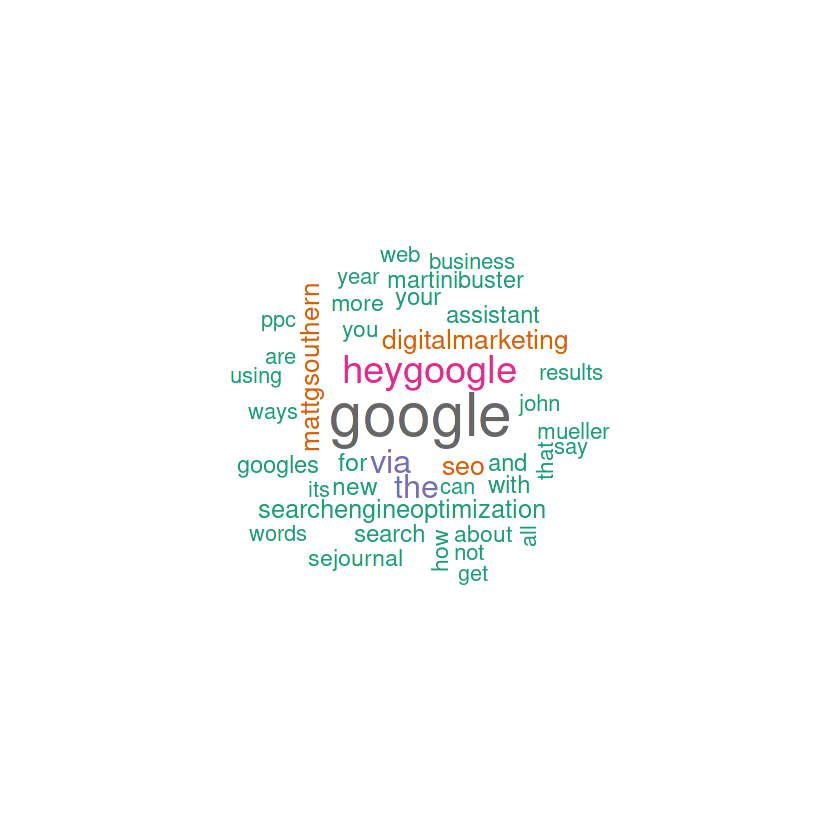

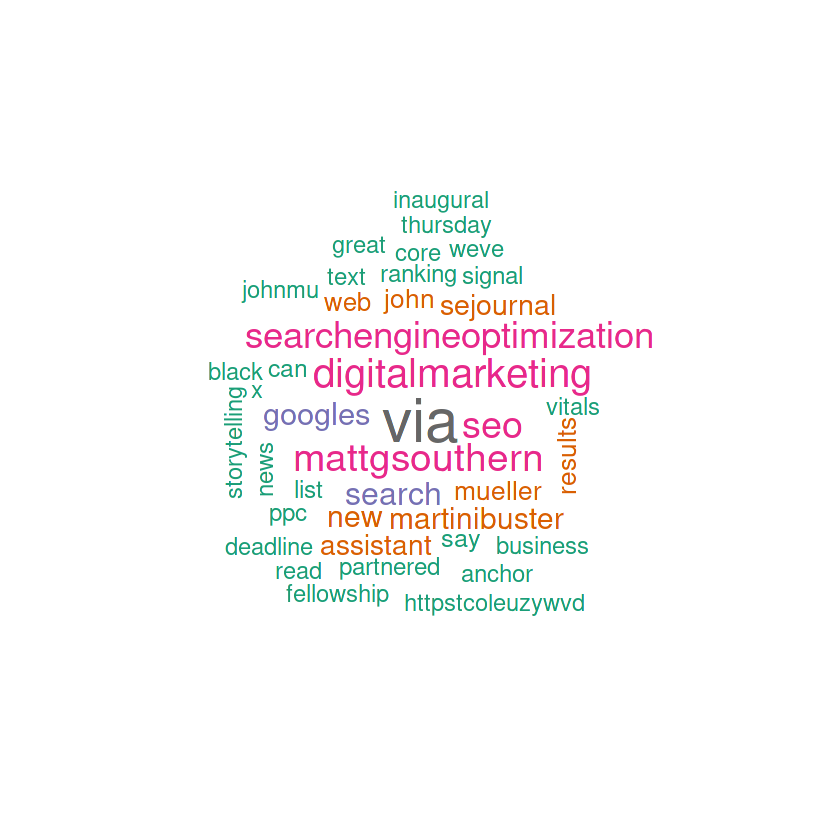

In [19]:
# Word cloud based on the original text with no preprocessing
tf <- termFreq(google_htweets_text$text)
wordcloud(names(tf),tf,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

# Word cloud based on the pre-processing
wordcloud(htweets_freq$word, htweets_freq$freq,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

Selecting by freq



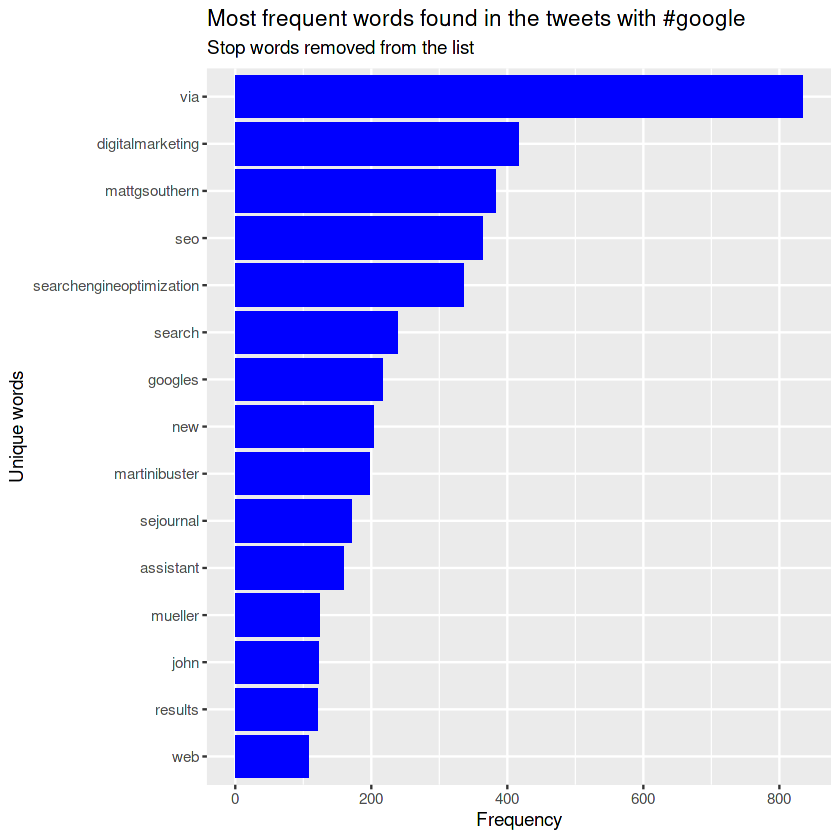

In [20]:
# bar chart of the most frequent words found in the tweets
htweets_freq %>% 
  top_n(15) %>%
  mutate(word = reorder(word, freq)) %>%
  ggplot(aes(x = word, y = freq)) +
  geom_col(fill="blue") +
  xlab(NULL) +
  coord_flip() +
  labs(y = "Frequency",
       x = "Unique words",
       title = "Most frequent words found in the tweets with #google",
       subtitle = "Stop words removed from the list")

In [21]:
# Creating the Document Term Matrix with integrated tfidf 
htweets_DTM <- google_htweets_tokenized %>%
              count(status_id,word , sort=TRUE) %>%
              cast_dtm(document = status_id, term = word,
              value = n, weighting = tm::weightTf)

In [22]:
str(htweets_DTM)

List of 6
 $ i       : int [1:18032] 1 1 88 350 1163 1 704 705 706 707 ...
 $ j       : int [1:18032] 1 2 2 2 2 3 3 3 3 3 ...
 $ v       : num [1:18032] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 1200
 $ ncol    : int 2308
 $ dimnames:List of 2
  ..$ Docs : chr [1:1200] "x1222255403276406784" "x1222257432807735298" "x1222257558527860736" "x1222257559173812230" ...
  ..$ Terms: chr [1:2308] "accept" "call" "center" "department" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [23]:
#associations/correlations between words (this is with the dtm):
findAssocs(htweets_DTM , terms = "google", corlimit = 0.10)

$google
numeric(0)

###  Summary of Tweets mentioning Google:

In [24]:
# Remove retweets
htweets_google_organic <- google_htweets[google_htweets$is_retweet==FALSE, ]

In [25]:
# Remove replies
htweets_google_organic <- subset(htweets_google_organic, is.na(htweets_google_organic$reply_to_status_id))
nrow(htweets_google_organic)

[1] 383

###### Tweets' engagement:

In [26]:
# average number of likes per tweet
averagelikes<-as.integer(mean(htweets_google_organic$favorite_count))
averagelikes

[1] 4

In [27]:
# average number of retweet per tweet 
averageretweets<-as.integer(mean(htweets_google_organic$retweet_count))
averageretweets

[1] 2

In [29]:
#tweets with highest favourite/like count
htweets_google_organic <- htweets_google_organic %>% arrange(desc(favorite_count))
htweets_google_organic[1,1:5]
htweets_google_organic[1,'favorite_count']

user_id,status_id,created_at,screen_name,text
<chr>,<chr>,<dttm>,<chr>,<chr>
x78805110,x1321920437194993666,2020-10-29 21:02:46,theblcklst,Great news for your Thursday! We've partnered with Google Assistant to create the inaugural Black List x Google Assistant Storytelling Fellowship! #heygoogle Read more in @deadline: https://t.co/iNwbH4Fawn https://t.co/3LEuzyWv6d


favorite_count
<dbl>
336


In [31]:
#tweets with highest retweets count
htweets_google_organic <- htweets_google_organic%>% arrange(desc(retweet_count))
htweets_google_organic[1,1:5]
htweets_google_organic[1,'retweet_count']

user_id,status_id,created_at,screen_name,text
<chr>,<chr>,<dttm>,<chr>,<chr>
x78805110,x1321920437194993666,2020-10-29 21:02:46,theblcklst,Great news for your Thursday! We've partnered with Google Assistant to create the inaugural Black List x Google Assistant Storytelling Fellowship! #heygoogle Read more in @deadline: https://t.co/iNwbH4Fawn https://t.co/3LEuzyWv6d


retweet_count
<dbl>
134


###### Types of Tweets:

In [32]:
# Keeping only the retweets
google_htweets_retweets <- google_htweets[google_htweets$is_retweet==TRUE,]
nrow(google_htweets_retweets)

[1] 799

In [33]:
# Keeping only the replies
google_htweets_retweets <- subset(google_htweets, !is.na(google_htweets$reply_to_status_id))
nrow(google_htweets_retweets )

[1] 18

In [34]:
# Creating a data frame base on the observations count for retweets, replies and organic tweets
data_google3 <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(383, 799, 18)
)

data_google3

category,count
<chr>,<dbl>
Organic,383
Retweets,799
Replies,18


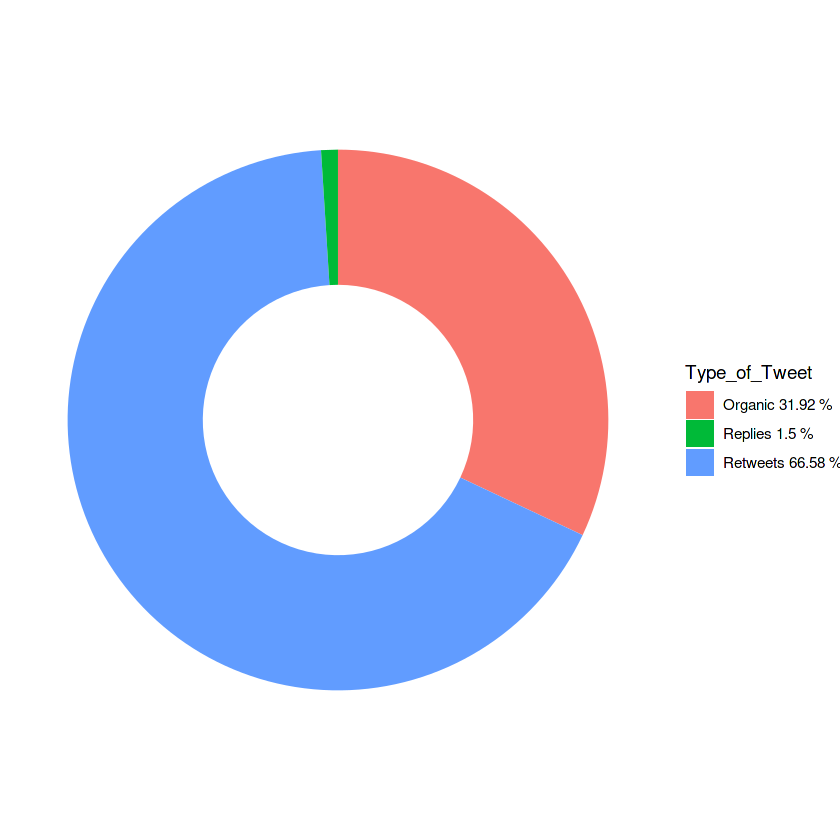

In [35]:
# Adding columns
data_google3$fraction = data_google3$count / sum(data_google3$count)
data_google3$percentage = data_google3$count / sum(data_google3$count) * 100
data_google3$ymax = cumsum(data_google3$fraction)
data_google3$ymin = c(0, head(data_google3$ymax, n=-1))
# Rounding the data to two decimal points
data_google3[,-1] <- round(data_google3[,-1], 2)
# Specify what the legend should say
Type_of_Tweet <- paste(data_google3$category, data_google3$percentage, "%")
ggplot(data_google3, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Type_of_Tweet)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

In [36]:
data_google3

category,count,fraction,percentage,ymax,ymin
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Organic,383,0.32,31.92,0.32,0.00
Retweets,799,0.67,66.58,0.99,0.32
Replies,18,0.01,1.50,1.00,0.99


###### Source of Tweets

In [37]:
#Group tweets per source to check from which source tweets are publish
google_app3 <- google_htweets %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())%>%
  top_n(10)
head(google_app3)

Selecting by count



source,count
<chr>,<int>
Buffer,66
dlvr.it,8
erased16170939,7
Hootsuite Inc.,22
IFTTT,167
Netvibes Widget,44


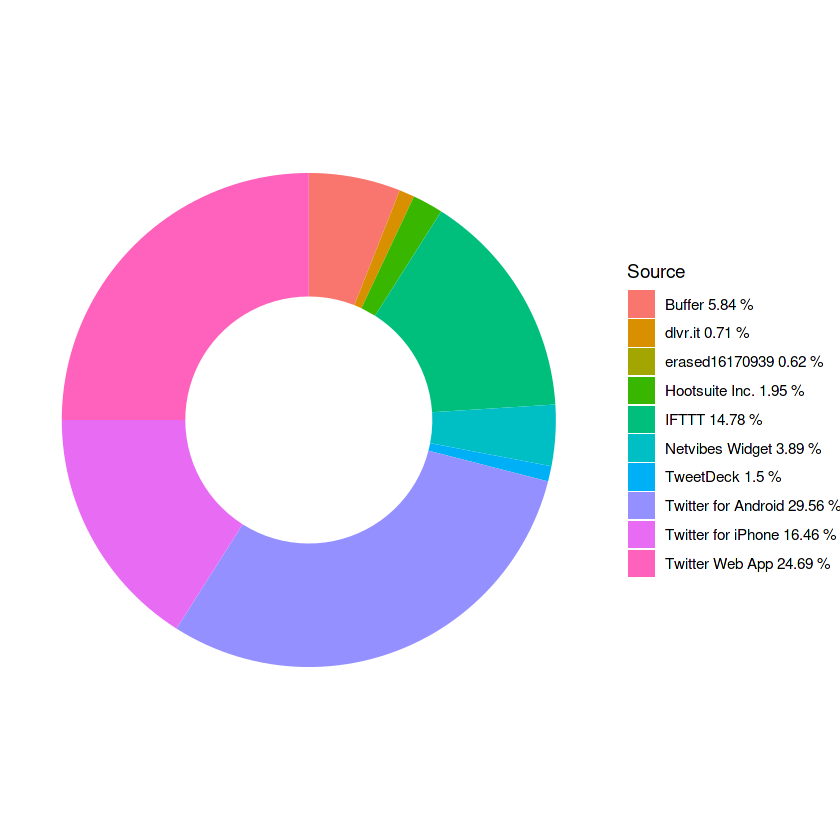

In [38]:
#Create data frame of source count per type
data_google_app3 <- data.frame(
  category=google_app3$source,
  count=google_app3$count
)

#Create statical value and plot the data
data_google_app3$fraction = data_google_app3$count / sum(data_google_app3$count)
data_google_app3$percentage = data_google_app3$count / sum(data_google_app3$count) * 100
data_google_app3$ymax = cumsum(data_google_app3$fraction)
data_google_app3$ymin = c(0, head(data_google_app3$ymax, n=-1))
data_google_app3[,-1] <- round(data_google_app3[,-1], 2)
Source <- paste(data_google_app3$category, data_google_app3$percentage, "%")
ggplot(data_google_app3, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Source)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

### Sentiment analysis Of Tweets mentioning #Google:

In [39]:
#Sentiment analysis
google_htweetsSentiment <- inner_join(google_htweets_tokenized,get_sentiments("bing"))

head(google_htweetsSentiment)
nrow(google_htweetsSentiment)

Joining, by = "word"



status_id,word,n,sentiment
<chr>,<chr>,<int>,<chr>
x1222255403276406784,disgusting,1,negative
x1222264684843360256,lied,1,negative
x1222264684843360256,verifiable,1,positive
x1222284305725919233,disabled,1,negative
x1222284305725919233,excel,1,positive
x1222284305725919233,indoctrinate,1,negative


[1] 711

In [40]:
#Get the most negative and positive words

google_htweets_Sentiment_summary <- google_htweetsSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(google_htweets_Sentiment_summary)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,cold,negative,3
2,critical,negative,3
3,unable,negative,3
4,fuck,negative,4
5,declines,negative,5
6,errors,negative,5


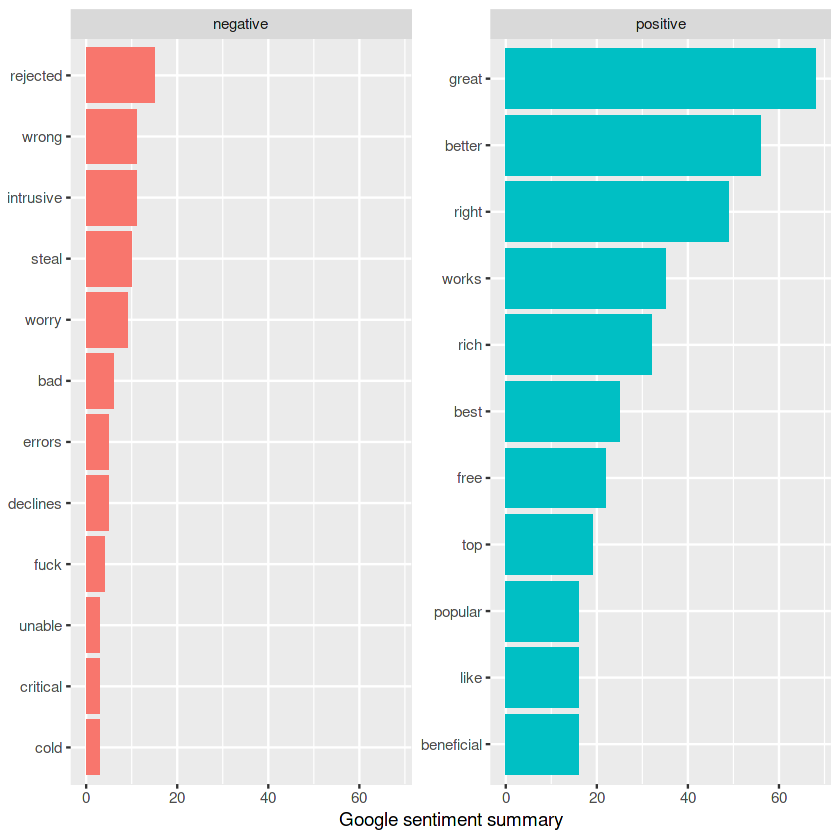

In [41]:
google_htweets_Sentiment_summary %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Google sentiment summary",
       x = NULL) +
  coord_flip()

###  Content Analysis:

In [57]:
# create topic model:
google_htweets_lda <- LDA(htweets_DTM, k = 6,method="gibbs",control = list(nstart = 5, burnin = 2000, best = TRUE, seed = 2:6) )

In [58]:
# look at model structure:
str(google_htweets_lda)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:18032] 1 5 4 5 4 5 4 5 6 4 ...
  ..@ alpha          : num 8.33
  ..@ call           : language LDA(x = htweets_DTM, k = 6, method = "gibbs", control = list(nstart = 5,      burnin = 2000, best = TRUE, seed = 2:6))
  ..@ Dim            : int [1:2] 1200 2308
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  .. .. ..@ delta        : num 0.1
  .. .. ..@ iter         : int 4000
  .. .. ..@ thin         : int 2000
  .. .. ..@ burnin       : int 2000
  .. .. ..@ initialize   : chr "random"
  .. .. ..@ alpha        : num 8.33
  .. .. ..@ seed         : int [1:5] 2 3 4 5 6
  .. .. ..@ verbose      : int 0
  .. .. ..@ prefix       : chr "/tmp/RtmpocmpQu/file1cb052a7538c"
  .. .. ..@ save         : int 0
  .. .. ..@ nstart       : int 5
  .. .. ..@ best         : logi TRUE
  .. .. ..@ keep         : int 0
  .. .. ..@ estimate.beta: lo

In [59]:
# terms per topic
google_htweet_topics <- tidy(google_htweets_lda,matrix = "beta")
head(google_htweet_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,accept,3.111036e-04
2,accept,3.260728e-05
3,accept,3.065792e-05
4,accept,3.123243e-05
5,accept,3.072385e-05
6,accept,3.230183e-05


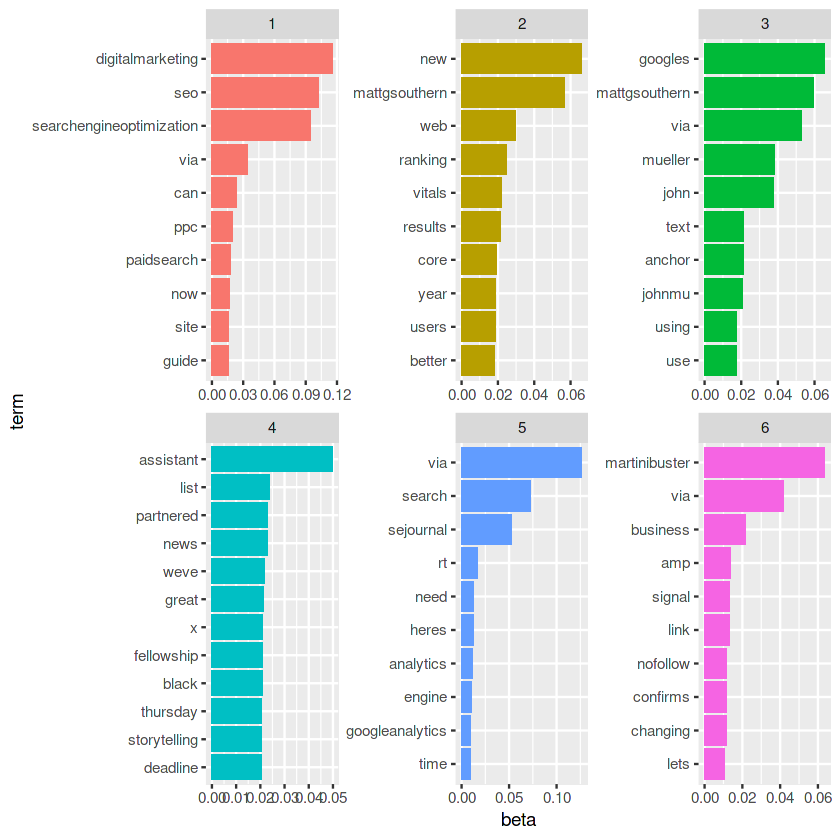

In [60]:
# visualize this

# you can use the following code to get the top terms per topic
google_top_htweet_terms <- google_htweet_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)


google_top_htweet_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

In [61]:
google_htweet_documents <- tidy(google_htweets_lda, matrix = "gamma")
# Choose, per tweet, the most important topic (the one with the highest weight)
google_htweet_doc_topic <- google_htweet_documents %>%
  group_by(document) %>%
  arrange(desc(gamma)) %>%
  slice(1) 

google_htweet_doc_topic %>%
  group_by(topic) %>% 
  summarise(nbr_documents = n())

,topic,nbr_documents
,<int>,<int>
1,1,287
2,2,182
3,3,151
4,4,159
5,5,201
6,6,220
